<a href="https://colab.research.google.com/github/Jarmos-san/PumpItUp/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DrivenData Competition | Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

Using data from Taarifa and the Tanzanian Ministry of Water, can you **predict which pumps are functional**, which **need some repairs**, and which **don't work at all**? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of **pump is operating**, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

# Importing Necessary Libraries

In [3]:
# Loading necessary libraries
import pandas as pd
import missingno
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the version for easier debugging at some point of time.
# print(f'Python v{python3.__version__}')
print(f'Pandas v{pd.__version__}')
print(f'Missingno v{missingno.__version__}')
print(f'Numpy v{np.__version__}')
print(f'Seaborn v{sns.__version__}')

# Instantiating a GDrive mount
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/PumpItUp/data
%matplotlib inline
sns.set_style(style='darkgrid')

Pandas v0.25.3
Missingno v0.4.2
Numpy v1.17.5
Seaborn v0.10.0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/PumpItUp/data


# Loading Files

In [8]:
FILEPATH = '/content/gdrive/My Drive/PumpItUp/data/'

# Load .csv files
TestData = pd.read_csv(f'{FILEPATH}TestData')
TrainData = pd.read_csv(f'{FILEPATH}TrainData')

print(f'The Training Set has {TrainData.shape[0]} rows & {TrainData.shape[1]} columns.')
print(f'The Testing Set has {TestData.shape[0]} rows & {TestData.shape[1]} columns.')

The Training Set has 59400 rows & 41 columns.
The Testing Set has 14850 rows & 40 columns.


# Exploratory Data Analysis

In [10]:
TrainData.sample()

,ID,TSHAmount,DateRecorded,Funder,GPSHeight,Installer,Longitutde,Latitude,WaterPointName,PrivateNum,Basin,SubVillage,Region,RegionCode,DistrictCode,LocalGovernmentArea,Ward,Population,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ConstructionYear,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterPointType,WaterPointTypeGroup,StatusGroup
56778,29665,0.0,2011-07-20,Government Of Tanzania,0,sengerema Water Department,32.558544,-2.706767,Kwa Sengasenga,0,Lake Victoria,Sima Majengo,Mwanza,19,5,Sengerema,Sima,0,True,GeoData Consultants Ltd,VWC,Rural water supply in Mwanza,True,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,dam,dam,surface,communal standpipe,communal standpipe,non functional


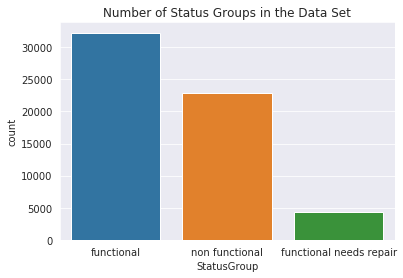

In [11]:
plt.title('Number of Status Groups in the Data Set')
sns.countplot(x=TrainData['StatusGroup'], data=TrainData)

In [19]:
for index, value in TrainData['StatusGroup'].value_counts().items():
    print(f'{index}: {value}({round((value/TrainData.shape[0])*100)}%)')

functional: 32259(54%)
non functional: 22824(38%)
functional needs repair: 4317(7%)
